**Exercise**: 

Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

from torch import nn
import torch.nn.functional as F
from torch import optim

import torch
import matplotlib.pyplot as plt

import helper

from torchvision import datasets, transforms


In [2]:
#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5,0.5),
                                                   (0.5, 0.5, 0.5))
                               ])
#download the training set data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

Processing...
Done!


In [9]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1)
                     )

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        
        #Flatten MNIST images
        images = images.view(images.shape[0],-1)
        
        #Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f'Training loss: {running_loss/len(trainloader)}')


Training loss: 1.9053586679480985
Training loss: 0.8755561650943146
Training loss: 0.5379098626469244
Training loss: 0.43924760848665034
Training loss: 0.3904074731030698


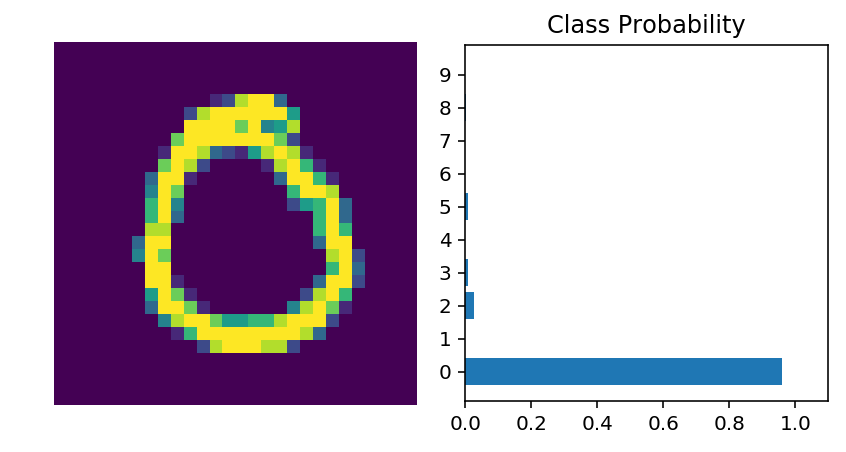

In [23]:
# check the prediction with the trained network
images, labels = next(iter(trainloader))
img = images[0].view(1,784)

#turn off gradient to speed up testing
with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28),ps)